# solution 1

In [3]:
# Basic information of alarms
# viz the graph

# Try TTPM Method
# Try notears
# Try another method in book

In [4]:
import os
import numpy as np
import pandas as pd

import os
# os.path.abspath('.')

In [5]:
import plotly.express as px
import plotly.graph_objects as go


# Read Data

In [6]:
dataset = 'dataset_1'

# alarm data
alarms = pd.read_csv(r'./datasets/dataset_1/alarm.csv')
# causal_prior
causal_prior= np.load(r'./datasets/dataset_1/causal_prior.npy')

# topology
topology = np.load(r'./datasets/dataset_1/topology.npy')

# rca
rca_prior = pd.read_csv(r'./datasets/dataset_1/rca_prior.csv')

print(f"shape of alarm data: {alarms.shape}")
print(f"shape of causal prior matrix: {causal_prior.shape}")
print(f"shape of topology prior matrix: {topology.shape}")
print(f"shape of rca prior matrix: {rca_prior.shape}")
# Notes: topology.npy and rca_prior.csv are not used in this script.

shape of alarm data: (141853, 4)
shape of causal prior matrix: (39, 39)
shape of topology prior matrix: (35, 35)
shape of rca prior matrix: (49, 2)


In [7]:
dataset = 'dataset_2'

# alarm data
alarms = pd.read_csv(r'./datasets/{}/alarm.csv'.format(dataset))
# causal_prior
causal_prior= np.load(r'./datasets/{}/causal_prior.npy'.format(dataset))

# topology
topology = np.load(r'./datasets/{}/topology.npy'.format(dataset))

# rca
rca_prior = pd.read_csv(r'./datasets/{}/rca_prior.csv'.format(dataset))

print(f"shape of alarm data: {alarms.shape}")
print(f"shape of causal prior matrix: {causal_prior.shape}")
print(f"shape of topology prior matrix: {topology.shape}")
print(f"shape of rca prior matrix: {rca_prior.shape}")
# Notes: topology.npy and rca_prior.csv are not used in this script.

shape of alarm data: (132688, 4)
shape of causal prior matrix: (49, 49)
shape of topology prior matrix: (42, 42)
shape of rca prior matrix: (47, 2)


# EDA and Preprocessing

In [8]:
# How is the alarm data organized?
# How does it looks like

In [9]:
alarms.head()

,alarm_id,device_id,start_timestamp,end_timestamp
0,45,20,6,43
1,27,23,11,40
2,6,24,13,60
3,15,26,17,32
4,23,40,18,68


In [10]:
# turn alarm_id and device_id into categorical data
alarms['alarm_id'] = alarms['alarm_id'].astype('category')
alarms['device_id'] = alarms['device_id'].astype('category')

In [11]:
alarms.shape

(132688, 4)

In [12]:
# is the alarm random?

alarms.groupby('alarm_id').count()

,device_id,start_timestamp,end_timestamp
alarm_id,,,
0,312,312,312
1,2319,2319,2319
2,2745,2745,2745
3,835,835,835
4,604,604,604
5,838,838,838
6,7600,7600,7600
7,4568,4568,4568
8,2110,2110,2110


In [13]:
# random select
alarms_sample = alarms.sample(n=10000, random_state=1)

# view of device_id
px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='device_id')

In [14]:
# view of alarm_id
px.scatter(alarms_sample, y='alarm_id', x='start_timestamp', color='alarm_id')

In [15]:
# view together

px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='alarm_id')

In [16]:
## count of device and alarm
alarms.groupby('device_id').count()

,alarm_id,start_timestamp,end_timestamp
device_id,,,
0,3326,3326,3326
1,2548,2548,2548
2,3068,3068,3068
3,884,884,884
4,1406,1406,1406
5,7215,7215,7215
6,1155,1155,1155
7,2175,2175,2175
8,2349,2349,2349


# Show prior matrix

In [17]:
causal_prior.shape,rca_prior.shape,topology.shape

((49, 49), (47, 2), (42, 42))

In [18]:
# !pip install pyvis

In [19]:
import matplotlib.pyplot as plt

In [26]:
import networkx as nx
from castle.metrics import MetricsDAG
from castle.common import GraphDAG

In [27]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

In [28]:
# too many nodes, not readable
g = nx.DiGraph(causal_prior)

# plt.figure(figsize=(12, 8))
# nx.draw(
#     G=g,
#     node_color=COLORS[0],
#     node_size=1200,
#     arrowsize=17,
#     with_labels=True,
#     font_color='white',
#     font_size=21,
#     pos=nx.circular_layout(g)
# )

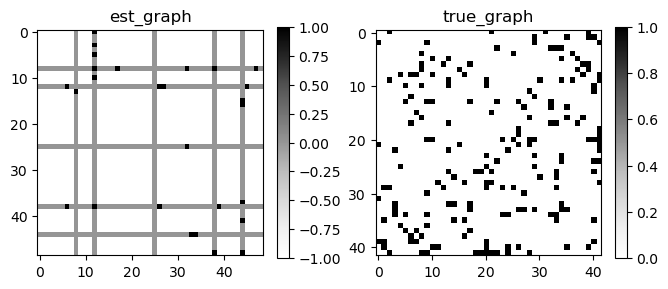

In [29]:
GraphDAG(
    est_dag=causal_prior, 
    true_dag=topology
    )

plt.show()

In [ ]:

from pyvis.network import Network

prior_net = Network("500px", "900px", notebook=True, directed=True, layout=False)

prior_g = nx.from_numpy_matrix(causal_prior, create_using=nx.DiGraph)

prior_net.from_nx(prior_g)
prior_net.show()

# est_net.from_nx(prior_g)
# est_net.show()

# est_net.show("../output/draw_graphs/est_graph.html")

TypeError: show() missing 1 required positional argument: 'name'

In [ ]:


GraphDAG(est_causal_matrix, dag_matrix)
g_score = MetricsDAG(est_causal_matrix, dag_matrix).metrics['gscore']
print(f"g-score: {g_score}")

NameError: name 'est_causal_matrix' is not defined